# Supportiv Take Home Challenge

In [1]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

In [2]:
user_activity_file = f"F:/Applications/Interview/supporttiv/user_activity_data.csv"
moderator_performance_file = f"F:/Applications/Interview/supporttiv/moderator_performance_data.csv"
recommendation_file = f"F:/Applications/Interview/supporttiv/recommendation_data.csv"


In [3]:
user_activity_data = pd.read_csv(user_activity_file)
moderator_performance_data = pd.read_csv(moderator_performance_file)
recommendation_data = pd.read_csv(recommendation_file)

In [4]:
print("User Activity Data:")
user_activity_data.head()

User Activity Data:


user_id                            session_id  \
0  73d11f2f-56f9-437f-b720-bd5c2293c3a6  caa70dce-7c17-44d3-8afb-c773f2a015ac   
1  704f6569-7263-4490-9eda-ae15a8a8c94c  d3f58575-5133-4f50-81b9-d40d10a2cc24   
2  75c93e70-8082-484b-a0b6-4ea590bddcb0  3943c73b-8652-4059-8bdc-01915c252841   
3  623dfbbc-a001-43d2-8ff2-8dba1a9f3642  45d45552-5852-426c-b7bb-c372d93a742d   
4  2f690ff2-f2cb-46e9-912e-8b04bfa292a1  2138d00d-f7d4-49c7-91aa-ac51a40e3508   

                    timestamp  session_length  messages_sent  feedback_rating  \
0  2024-06-06 09:47:44.600128             107             30                4   
1  2024-10-12 15:28:14.926310              56             15                4   
2  2024-07-01 21:30:38.935476              97             27                3   
3  2024-10-03 23:27:47.556656              19             34                4   
4  2024-04-16 06:50:33.720596             111             38                3   

   resources_clicked  
0                  3  
1                  1  
2                  1  
3                  2  
4                  0

In [5]:
print("\nModerator Performance Data:")
moderator_performance_data.head()


Moderator Performance Data:


moderator_id  chat_sessions_moderated  \
0  06069322-b9af-488c-8ee5-451195abfab3                      283   
1  a5eb17c5-6ca1-4f5e-9254-b97785b0680f                       28   
2  9132caa1-bb9e-4a75-9efe-663693ee6180                      480   
3  a2437979-fdd0-4b73-8fa9-8f05cfee0ebb                      320   
4  222a3d85-66c0-4992-99d2-9b13dc94b9fe                      367   

   avg_response_time  user_satisfaction_score  
0              16.18                        2  
1               6.52                        2  
2              12.15                        4  
3               8.45                        5  
4              13.82                        2

In [6]:
print("\nRecommendation Data:")
recommendation_data.head()


Recommendation Data:


recommendation_id                               user_id  \
0  dde2327b-f957-4239-b209-28d156b52f78  9cc000c2-6b64-414f-a465-ee2ecd26d22e   
1  1150e284-1921-4225-89f2-8904dd851791  4bf2ac88-cff7-44f1-b3ff-b53af19f117c   
2  2c197953-1e5c-4e49-9248-ac6f0fe368c5  d28f7b29-cbd6-4493-b6da-3ab72ca12e94   
3  ecd4cc19-c3f6-4c9f-be0b-2da40fd6d28d  dfb8f9c1-f0c9-4735-8663-be4014fa77a8   
4  f1b6193b-ce64-4574-8e5d-57da5a734056  3b0e1498-56b6-4b2e-8379-811065cad369   

  recommendation_type  click_through_rate  feedback_score  
0             Podcast                0.29               3  
1             Podcast                0.31               5  
2             Podcast                0.54               4  
3                Blog                0.26               5  
4               Video                0.40               3

## Understanding Data sets

1. User Activity Data: 
Captures details about user sessions, including session length, messages sent, feedback ratings, and resources clicked.

2. Moderator Performance Data: 
Tracks metrics like sessions moderated, average response times, and user satisfaction scores.

3. Recommendation Data: 
Includes data on recommendation types, click-through rates, and feedback scores.

click-through rate: Clickthrough rate (CTR) can be used to gauge how well your keywords and ads, and free listings, are performing. CTR is the number of clicks that your ad receives divided by the number of times your ad is shown: clicks ÷ impressions = CTR. For example, if you had 5 clicks and 100 impressions, then your CTR would be 5%.

higher click-through rate is better
https://support.google.com/google-ads/answer/2615875?hl=en#:~:text=Clickthrough%20rate%20(CTR)%20can%20be,your%20CTR%20would%20be%205%25.

In [7]:
user_activity_count = user_activity_data.shape[0]
moderator_performance_count = moderator_performance_data.shape[0]
recommendation_count = recommendation_data.shape[0]

# Print the counts
print(f"Number of rows in User Activity Data: {user_activity_count}")
print(f"Number of rows in Moderator Performance Data: {moderator_performance_count}")
print(f"Number of rows in Recommendation Data: {recommendation_count}")

Number of rows in User Activity Data: 1000
Number of rows in Moderator Performance Data: 100
Number of rows in Recommendation Data: 500


# Profile

In [8]:
profile_user_activity_data = ProfileReport(
    user_activity_data, title="User Activity Data", html={"style": {"full_width": True}}, sort=None
)
profile_user_activity_data.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

feedback_rating  messages_sent  resources_clicked  \
feedback_rating           1.000000      -0.025373           0.099375   
messages_sent            -0.025373       1.000000           0.020104   
resources_clicked         0.099375       0.020104           1.000000   
session_length            0.253964       0.009310           0.049525   

                   session_length  
feedback_rating          0.253964  
messages_sent            0.009310  
resources_clicked        0.049525  
session_length           1.000000

user_id                            session_id  \
0  73d11f2f-56f9-437f-b720-bd5c2293c3a6  caa70dce-7c17-44d3-8afb-c773f2a015ac   
1  704f6569-7263-4490-9eda-ae15a8a8c94c  d3f58575-5133-4f50-81b9-d40d10a2cc24   
2  75c93e70-8082-484b-a0b6-4ea590bddcb0  3943c73b-8652-4059-8bdc-01915c252841   
3  623dfbbc-a001-43d2-8ff2-8dba1a9f3642  45d45552-5852-426c-b7bb-c372d93a742d   
4  2f690ff2-f2cb-46e9-912e-8b04bfa292a1  2138d00d-f7d4-49c7-91aa-ac51a40e3508   
5  264c18df-cf41-49fd-9bd9-9f17b9e68549  f47d46ec-a26c-4024-9415-262d8316cd3f   
6  159c0665-af87-480f-b073-c36c031f5ac6  ca41f4c2-98f2-4819-a449-88ca3a1c0b26   
7  9e817dc4-0055-42ce-8c36-511fd3ec8a6e  8e4fa671-9bc3-498a-bb1a-58ffb3344575   
8  48133715-836b-4832-a942-66297dbd8dd7  5ecf0fab-3ca7-43ab-b111-e3b4404feb35   
9  9e728e3f-f11e-428b-a6f8-d447bf8b7056  5e42c22a-203d-459b-aa3f-e47576511b3b   

                    timestamp  session_length  messages_sent  feedback_rating  \
0  2024-06-06 09:47:44.600128             107             30                4   
1  2024-10-12 15:28:14.926310              56             15                4   
2  2024-07-01 21:30:38.935476              97             27                3   
3  2024-10-03 23:27:47.556656              19             34                4   
4  2024-04-16 06:50:33.720596             111             38                3   
5  2024-08-31 23:34:27.429215              76             33                4   
6  2024-09-08 01:35:41.587595              65             24                4   
7  2024-09-29 02:39:27.729580              25             15                1   
8  2024-02-17 01:41:54.583388             128             39                5   
9  2024-01-16 04:46:32.293158             104             54                5   

   resources_clicked  
0                  3  
1                  1  
2                  1  
3                  2  
4                  0  
5                  4  
6                  3  
7                  1  
8                  0  
9                  2

user_id  \
990  0c0d267b-cdb4-44aa-825a-05fe28c39ca6   
991  b5453469-e29a-446b-8aa3-35dd93645cc1   
992  d4dae25d-7d32-4b89-962c-5c618f4dee0e   
993  e05052cd-288e-4941-8742-53516cca85dd   
994  85c3f6fa-8e2c-48d6-9188-edb298f2a217   
995  6d6ee30d-90cb-46c0-b2bc-b768d2ac67f4   
996  e1bab7d4-486e-4ed7-8a42-4f97e1a60f8f   
997  4dac9b3b-68cd-40b8-b455-5f22826dd0de   
998  c143fc9f-d4e7-40ba-92e6-3767ac558554   
999  4c443d20-0d57-4c1d-936e-17dae1da5b61   

                               session_id                   timestamp  \
990  0602cea4-48f9-4e71-bfa9-d7c317a99cb9  2024-01-14 14:19:45.660393   
991  ff8184cc-09a2-4433-8371-f7ba4beb0100  2024-01-19 14:03:33.261165   
992  bd73988f-c2fa-463b-bce9-9304c18c4f42  2024-01-24 04:27:05.683719   
993  b01fa418-6f6f-4062-84e4-8700a212ec37  2024-09-13 07:08:29.023160   
994  e2922788-90e5-4394-8e55-4f146a47a4e3  2024-06-24 15:29:00.778266   
995  4cccc635-2a22-4621-9397-47b851b83432  2024-03-30 15:36:39.159795   
996  4b289c01-b41b-4c96-8a1d-18393a87b1d1  2024-03-18 16:20:39.850435   
997  f2b4a2b4-0d8b-4392-97f1-df3fe6a9486b  2024-05-15 07:43:18.636818   
998  8022b33a-8987-472e-9c64-e5b9ade94647  2024-06-07 06:57:31.448070   
999  655e0a00-4dbc-4045-9d5b-6ae73534ba93  2024-07-19 05:29:45.912573   

     session_length  messages_sent  feedback_rating  resources_clicked  
990              94             37                5                  3  
991              66              5                2                  2  
992             128             22                3                  3  
993              42             35                1                  2  
994              68             13                5                  1  
995             102             41                4                  0  
996              42             39                1                  3  
997              54             15                5                  2  
998             102             43                6                  6  
999              86             29                3                  0

In [9]:
profile_user_activity_data

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## By profiling "User Activity Data", we can infer that
1. There are no duplicates
2. Timestamp needs to be modified to date format
3. user_id and session_id are distinct
4. feedback_rating has maximum value 6 and its not mentioned out of 10 or 5.
5. 21% resources_clicked values are zeros, need more analysis
6. Report doesnt show any discrepany in values

In [10]:
user_activity_data['timestamp'] = pd.to_datetime(user_activity_data['timestamp'], errors='coerce')
user_activity_data.head(5)

user_id                            session_id  \
0  73d11f2f-56f9-437f-b720-bd5c2293c3a6  caa70dce-7c17-44d3-8afb-c773f2a015ac   
1  704f6569-7263-4490-9eda-ae15a8a8c94c  d3f58575-5133-4f50-81b9-d40d10a2cc24   
2  75c93e70-8082-484b-a0b6-4ea590bddcb0  3943c73b-8652-4059-8bdc-01915c252841   
3  623dfbbc-a001-43d2-8ff2-8dba1a9f3642  45d45552-5852-426c-b7bb-c372d93a742d   
4  2f690ff2-f2cb-46e9-912e-8b04bfa292a1  2138d00d-f7d4-49c7-91aa-ac51a40e3508   

                   timestamp  session_length  messages_sent  feedback_rating  \
0 2024-06-06 09:47:44.600128             107             30                4   
1 2024-10-12 15:28:14.926310              56             15                4   
2 2024-07-01 21:30:38.935476              97             27                3   
3 2024-10-03 23:27:47.556656              19             34                4   
4 2024-04-16 06:50:33.720596             111             38                3   

   resources_clicked  
0                  3  
1                  1  
2                  1  
3                  2  
4                  0

In [11]:
profile_moderator_performance_data = ProfileReport(
    moderator_performance_data, title="Moderator Performance Data", html={"style": {"full_width": True}}, sort=None
)
profile_moderator_performance_data.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

avg_response_time  chat_sessions_moderated  \
avg_response_time                 1.000000                -0.026056   
chat_sessions_moderated          -0.026056                 1.000000   
user_satisfaction_score           0.279176                 0.119934   

                         user_satisfaction_score  
avg_response_time                       0.279176  
chat_sessions_moderated                 0.119934  
user_satisfaction_score                 1.000000

moderator_id  chat_sessions_moderated  \
0  06069322-b9af-488c-8ee5-451195abfab3                      283   
1  a5eb17c5-6ca1-4f5e-9254-b97785b0680f                       28   
2  9132caa1-bb9e-4a75-9efe-663693ee6180                      480   
3  a2437979-fdd0-4b73-8fa9-8f05cfee0ebb                      320   
4  222a3d85-66c0-4992-99d2-9b13dc94b9fe                      367   
5  8da56bb7-e9f4-4617-963c-6ea18d9c900f                      383   
6  4acafd75-dcdb-49ca-a2e4-50341a1750bf                      475   
7  3cdba36a-03ce-4f77-8195-83a39fe1470a                      163   
8  99415163-e4a7-44f5-82e5-ebcc6d19ef87                      399   
9  cb260e80-19a6-4ae3-8ad4-7a1334e2269d                      269   

   avg_response_time  user_satisfaction_score  
0              16.18                        2  
1               6.52                        2  
2              12.15                        4  
3               8.45                        5  
4              13.82                        2  
5               6.33                        2  
6               5.45                        3  
7              18.53                        3  
8               3.83                        2  
9              11.11                        2

moderator_id  chat_sessions_moderated  \
90  729ab283-4c69-4b48-ac2c-40533c4be293                      126   
91  71676997-8081-4f64-8c62-aba1523e41f1                      103   
92  6c21531c-1493-414c-a4c7-8d35a2339fb7                      172   
93  a9257d0d-7007-41bb-a336-5fe0d3a2f1c5                      108   
94  f747bcc4-f069-47da-a0c1-922e5e35c5c2                      122   
95  45fbb3a6-6964-4ff0-80ee-6261a884f71f                      368   
96  6d5f5120-c4a9-4ca7-bc61-66c5007dd590                      100   
97  79e74b69-af51-44cf-8df8-5edbbbf6d562                      355   
98  c29eb4ef-b90d-4129-b671-c5429483d85d                      215   
99  89798e7c-c01b-4dfb-af41-d841ec5d0698                       26   

    avg_response_time  user_satisfaction_score  
90              16.05                        5  
91              12.51                        3  
92              19.14                        2  
93               2.76                        2  
94               6.78                        2  
95              12.83                        4  
96               7.34                        5  
97              14.86                        4  
98              15.66                        2  
99               3.85                        3

In [12]:
profile_moderator_performance_data

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# By profiling "Moderator Performance Data", we can infer that
1. There are no duplicates or missing values
2. moderator_id is distinct
3. We have check outliers for avg_reponse time.
4. Report doesnt show any discrepany in values

In [13]:
profile_recommendation_data = ProfileReport(
    recommendation_data, title="Recommendation Data", html={"style": {"full_width": True}}, sort=None
)
profile_recommendation_data.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

click_through_rate  feedback_score  recommendation_type
click_through_rate             1.000000             0.0             0.270052
feedback_score                 0.000000             1.0             0.000000
recommendation_type            0.270052             0.0             1.000000

recommendation_id                               user_id  \
0  dde2327b-f957-4239-b209-28d156b52f78  9cc000c2-6b64-414f-a465-ee2ecd26d22e   
1  1150e284-1921-4225-89f2-8904dd851791  4bf2ac88-cff7-44f1-b3ff-b53af19f117c   
2  2c197953-1e5c-4e49-9248-ac6f0fe368c5  d28f7b29-cbd6-4493-b6da-3ab72ca12e94   
3  ecd4cc19-c3f6-4c9f-be0b-2da40fd6d28d  dfb8f9c1-f0c9-4735-8663-be4014fa77a8   
4  f1b6193b-ce64-4574-8e5d-57da5a734056  3b0e1498-56b6-4b2e-8379-811065cad369   
5  28337148-9a48-4098-90f9-d44ee1b5b396  706b1459-82b8-42cb-a153-4e64a6c7cfb2   
6  252a710d-097b-47f7-bcf3-e5717691f15c  e1694440-75fb-4a18-a41a-7a5a2dbf7259   
7  11421ef4-c469-4fad-9009-099e18b66bde  72f26446-7e29-455a-8f99-7bdf3516b94e   
8  17a752db-2ada-4b7c-a1e5-2cf72fbc29da  e1694440-75fb-4a18-a41a-7a5a2dbf7259   
9  e6b7d209-03cf-4e3c-b11c-0b5609156d44  7bff4f32-fc61-4cc7-8a47-fb2f108690af   

  recommendation_type  click_through_rate  feedback_score  
0             Podcast                0.29               3  
1             Podcast                0.31               5  
2             Podcast                0.54               4  
3                Blog                0.26               5  
4               Video                0.40               3  
5               Video                0.35               4  
6                Blog                0.86               1  
7               Video                1.00               5  
8             Podcast                0.59               5  
9               Video                1.00               4

recommendation_id  \
490  cfef6582-88a2-4fd8-a94d-b3548dd6d5e9   
491  22937aa3-e331-4bfe-837c-c4427594deab   
492  3a509ffe-4813-496c-9e66-7fbe3dea83b6   
493  fff12082-f3ab-4174-8c4d-c88cb20304fc   
494  e14fcbf9-51c7-4026-be68-1f9416d37846   
495  fa88ed4e-4635-486f-805b-d62b64acd345   
496  c983d319-292e-4470-8a1a-5c18f10e163c   
497  86fda91a-58e4-4399-be7f-37eaa71f4a5c   
498  093a7990-b1f8-4a1f-a6d7-e79deb92abae   
499  b6eaeac1-f526-4411-87e5-475bc2cc56e7   

                                  user_id recommendation_type  \
490  afddc49c-134c-43eb-8234-0be97c5e1a43             Podcast   
491  74199fe8-e8fe-45cd-a0eb-1a755f755840             Podcast   
492  87047d19-2601-4847-9e8c-20f8cc6bfa3f               Video   
493  5ca6d884-e244-469d-820c-3168c19c0f4c                Blog   
494  81f51034-f5f1-4204-82c8-aed613a26891                Blog   
495  8bfd607a-5b46-427b-9ae8-207edcaefa1f             Podcast   
496  bcef7db3-fad6-45bf-951d-f5238db8a958               Video   
497  bbd18ccf-c856-4302-b4bf-8c6d93e7ecd1               Video   
498  cfa41b92-cacb-4143-b0fa-2b76ce750545                Blog   
499  aa8e14de-21bc-440b-b31f-b6ae7dcf8757                Blog   

     click_through_rate  feedback_score  
490                0.68               2  
491                0.73               1  
492                1.00               2  
493                0.58               5  
494                0.35               3  
495                0.77               3  
496                0.71               1  
497                0.68               3  
498                0.30               1  
499                0.71               1

In [14]:
profile_recommendation_data

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# By profiling "Recommendation Data", we can infer that
1. There are no duplicates or missing values
2. recommendation_id is distinct, can use user_id to join User data and Recommendation data
3. We have check outliers for avg_reponse time.
4. Report doesnt show any discrepany in values


# Loading data into database

In [17]:
#connection details
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"  
    "DATABASE=challenge;"  
    "UID=**;" 
    "PWD=**;" 
)
cursor = conn.cursor()


In [18]:
create_user_activity_table = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='user_activity' AND xtype='U')
CREATE TABLE user_activity (
    user_id VARCHAR(40),
    session_id VARCHAR(40),
    timestamp DATETIME,
    session_length INT,
    messages_sent INT,
    feedback_rating INT,
    resources_clicked INT
);
"""

create_moderator_performance_table = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='moderator_performance' AND xtype='U')
CREATE TABLE moderator_performance (
    moderator_id VARCHAR(40),
    chat_sessions_moderated INT,
    avg_response_time FLOAT,
    user_satisfaction_score INT
);
"""

create_recommendation_table = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='recommendation' AND xtype='U')
CREATE TABLE recommendation (
    recommendation_id VARCHAR(40),
    user_id VARCHAR(40),
    recommendation_type VARCHAR(10),
    click_through_rate FLOAT,
    feedback_score INT
);
"""

# Execute table creation queries
cursor.execute(create_user_activity_table)
cursor.execute(create_moderator_performance_table)
cursor.execute(create_recommendation_table)
conn.commit()

print("Tables created successfully (if they didn't already exist).")


Tables created successfully (if they didn't already exist).


In [ ]:
# Function to insert data from DataFrame into SQL Server
def insert_data_from_df(df, table_name):
    # Generate a parameterized query based on DataFrame columns
    columns = ', '.join(df.columns)
    placeholders = ', '.join(['?'] * len(df.columns))  # Use '?' for pyodbc
    insert_query = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"
    
    # Convert DataFrame to a list of tuples for bulk insertion
    data = [tuple(row) for row in df.itertuples(index=False)]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"Inserted {len(data)} rows into {table_name}.")


# Insert datasets into respective tables
insert_data_from_df(user_activity_data, "user_activity")
insert_data_from_df(moderator_performance_data, "moderator_performance")
insert_data_from_df(recommendation_data, "recommendation")

# Close the connection
cursor.close()
conn.close()
print("Data inserted successfully and connection closed.")


# User Activity and Recommendation Analysis

User Activity Analysis by Feedback Rating:
   feedback_rating  session_length  messages_sent  resources_clicked
0                1       40.957265      29.393162           1.572650
1                2       60.518135      28.528497           2.139896
2                3       67.605556      29.166667           2.177778
3                4       62.243386      29.063492           2.010582
4                5       75.646853      26.129371           2.174825
5                6       73.171429      37.971429           3.142857


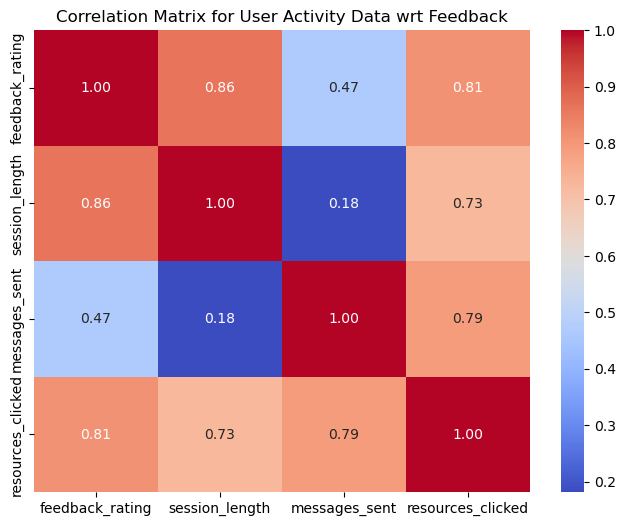

In [19]:
%matplotlib inline
# Average session length, messages sent, and resources clicked per feedback rating
user_activity_grouped = user_activity_data.groupby('feedback_rating').agg({
    'session_length': 'mean',
    'messages_sent': 'mean',
    'resources_clicked': 'mean'
}).reset_index()

print("User Activity Analysis by Feedback Rating:")
print(user_activity_grouped)

user_activity_corr = user_activity_grouped.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(user_activity_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix for User Activity Data wrt Feedback")
plt.show()

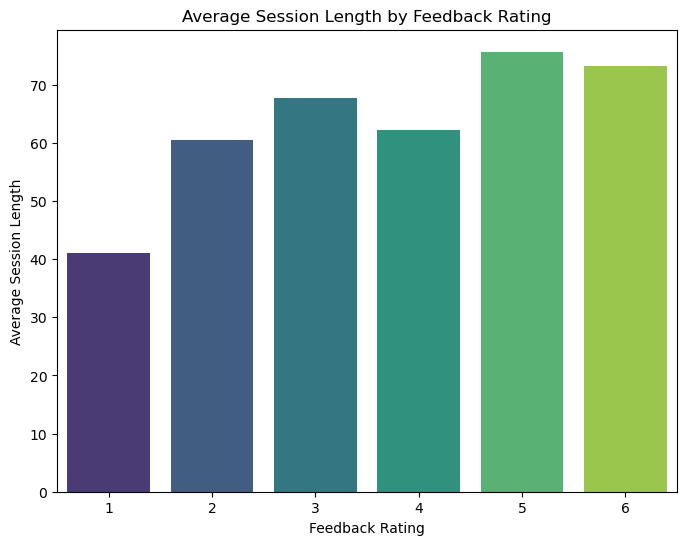

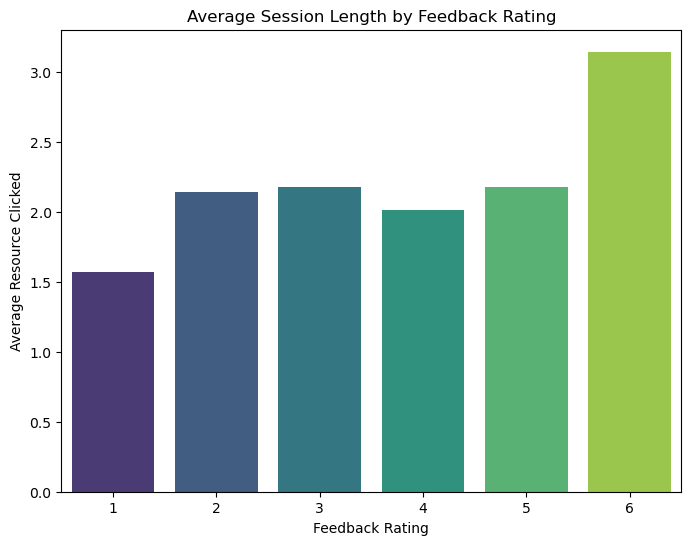

In [22]:
#To analyse co relation further
plt.figure(figsize=(8, 6))
sns.barplot(data=user_activity_grouped, x='feedback_rating', y='session_length', palette='viridis')
plt.title("Average Session Length by Feedback Rating")
plt.xlabel("Feedback Rating")
plt.ylabel("Average Session Length")
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=user_activity_grouped, x='feedback_rating', y='resources_clicked', palette='viridis')
plt.title("Average Session Length by Feedback Rating")
plt.xlabel("Feedback Rating")
plt.ylabel("Average Resource Clicked")
plt.show()


### Insights:
    
•	Longer sessions and greater resource interactions are the most significant factors contributing to positive feedback.

•	Messaging shows a moderate correlation with feedback, indicating its supportive role in enhancing user satisfaction.

•	Encouraging users to interact with resources can improve both feedback ratings and session length. Further analysis is needed to determine whether unrelated or unsatisfactory resources can still influence overall engagement and satisfaction.


  day_of_week  session_length  messages_sent  feedback_rating
1      Monday       64.006369      27.687898         3.267516
5     Tuesday       63.446281      28.107438         3.438017
6   Wednesday       62.846667      30.086667         3.246667
4    Thursday       65.977099      28.053435         3.755725
0      Friday       62.892086      28.374101         3.438849
2    Saturday       66.800000      27.917241         3.524138
3      Sunday       66.095541      29.057325         3.452229


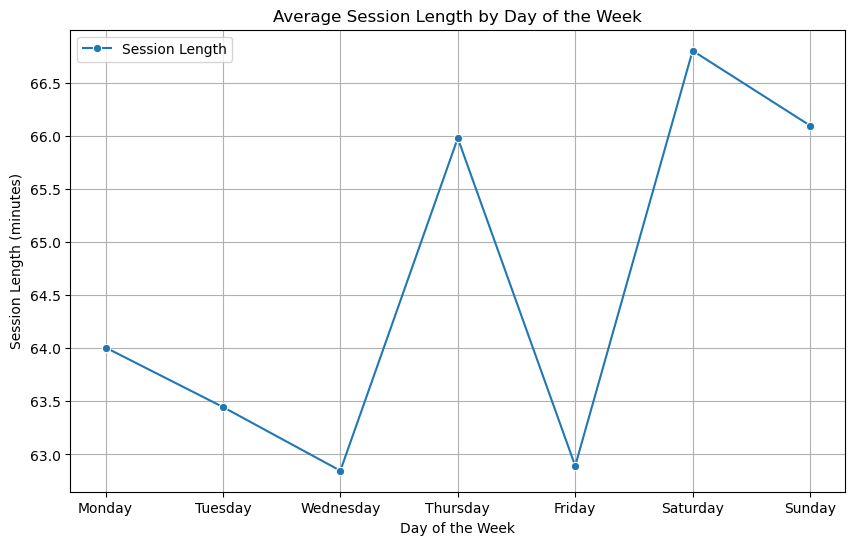

In [23]:
user_activity_data['day_of_week'] = user_activity_data['timestamp'].dt.day_name()

weekday_analysis = user_activity_data.groupby('day_of_week').agg({
    'session_length': 'mean',
    'messages_sent': 'mean',
    'feedback_rating': 'mean'
}).reset_index()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_analysis['day_of_week'] = pd.Categorical(weekday_analysis['day_of_week'], categories=days_order, ordered=True)
weekday_analysis = weekday_analysis.sort_values('day_of_week')


print(weekday_analysis)

# weekday-wise session length
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_analysis, x='day_of_week', y='session_length', marker='o', label='Session Length')
plt.title("Average Session Length by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Session Length (minutes)")
plt.grid(True)
plt.legend()
plt.show()


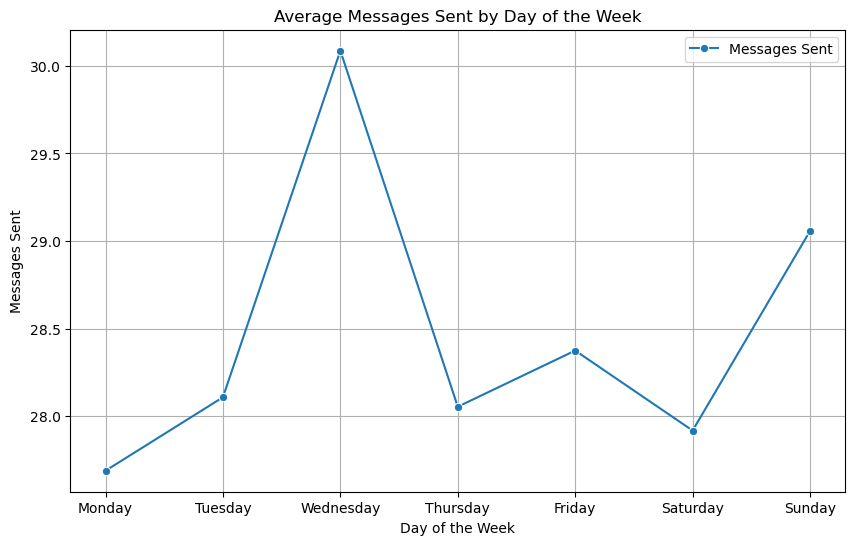

In [24]:
# weekday-wise messages sent
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_analysis, x='day_of_week', y='messages_sent', marker='o', label='Messages Sent')
plt.title("Average Messages Sent by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Messages Sent")
plt.grid(True)
plt.legend()
plt.show()


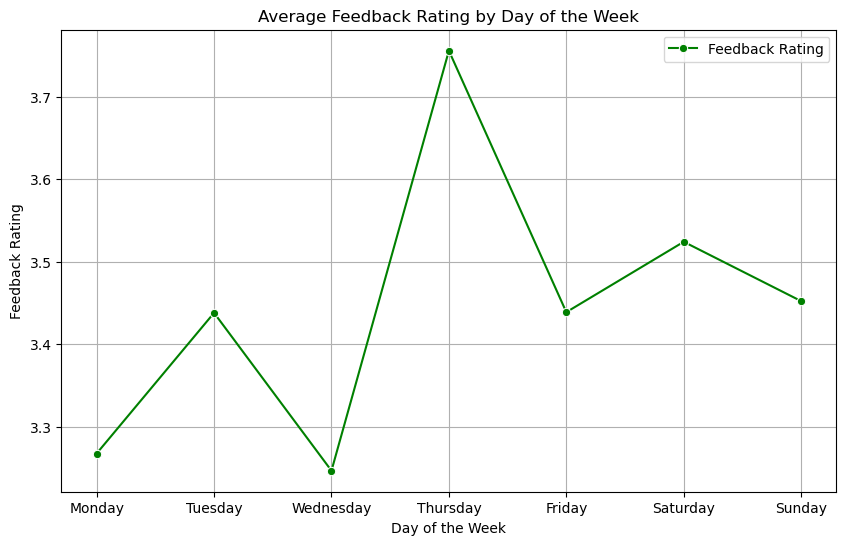

In [25]:
# weekday-wise feedback rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_analysis, x='day_of_week', y='feedback_rating', marker='o', label='Feedback Rating', color='green')
plt.title("Average Feedback Rating by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Feedback Rating")
plt.grid(True)
plt.legend()
plt.show()

## Insight of Week Day Analysis

Session lengths peak on weekends (Saturday, Sunday), showing higher engagement, while messages are highest on Wednesday, indicating mid-week communication spikes. 

Feedback ratings peak on Thursday, suggesting higher satisfaction mid-week. 

Despite longer weekend sessions, message activity declines, indicating passive engagement. 

### Key strategies:

Targeting recommendations during weekends for engagement and focusing on feedback-driven improvements mid-week, especially on Thursday.

## To assess recommendation effectiveness, focusing on CTR (engagement) and feedback score (satisfaction).


Recommendation Effectiveness by Type:
  recommendation_type  click_through_rate  feedback_score
0                Blog            0.467852        3.100671
1             Podcast            0.500221        2.966851
2               Video            0.582588        3.088235


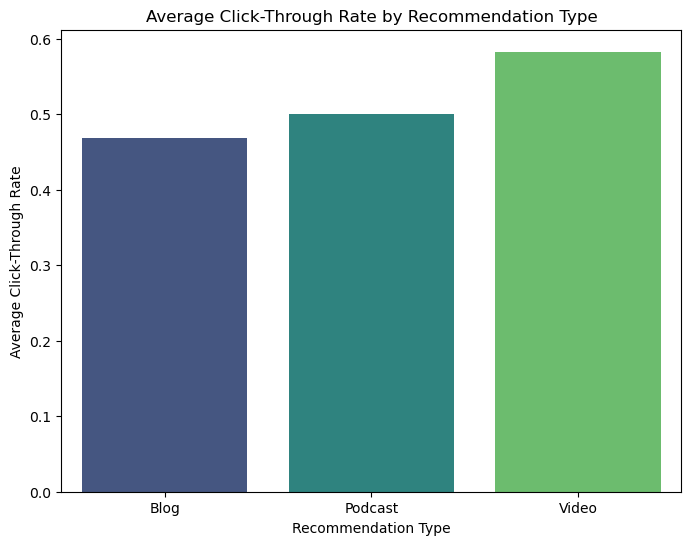

In [26]:
recommendation_grouped = recommendation_data.groupby('recommendation_type').agg({
    'click_through_rate': 'mean',
    'feedback_score': 'mean'
}).reset_index()

print("\nRecommendation Effectiveness by Type:")
print(recommendation_grouped)

plt.figure(figsize=(8, 6))
sns.barplot(data=recommendation_grouped, x='recommendation_type', y='click_through_rate', palette='viridis')
plt.title("Average Click-Through Rate by Recommendation Type")
plt.xlabel("Recommendation Type")
plt.ylabel("Average Click-Through Rate")
plt.show()


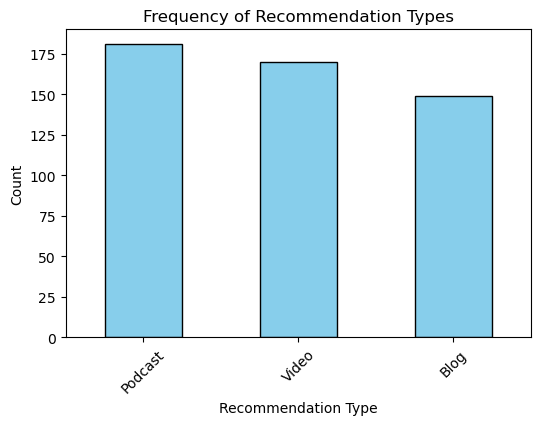

In [27]:
recommendation_type_count = recommendation_data['recommendation_type'].value_counts()

plt.figure(figsize=(6, 4))
recommendation_type_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Recommendation Types")
plt.xlabel("Recommendation Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

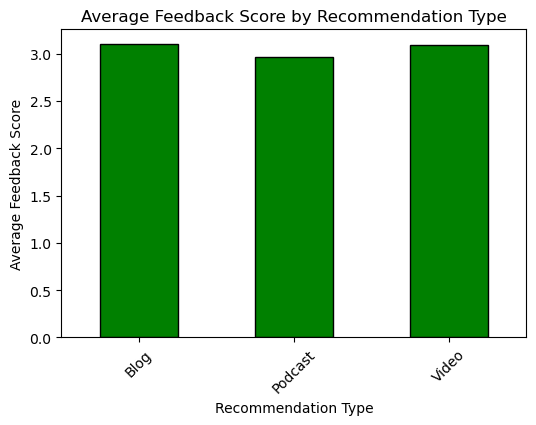

In [28]:
average_feedback_score = recommendation_data.groupby('recommendation_type')['feedback_score'].mean()

plt.figure(figsize=(6, 4))
average_feedback_score.plot(kind='bar', color='green', edgecolor='black')
plt.title("Average Feedback Score by Recommendation Type")
plt.xlabel("Recommendation Type")
plt.ylabel("Average Feedback Score")
plt.xticks(rotation=45)
plt.show()


Correlation Matrix:
                     click_through_rate  feedback_score
click_through_rate            1.000000        0.001111
feedback_score                0.001111        1.000000


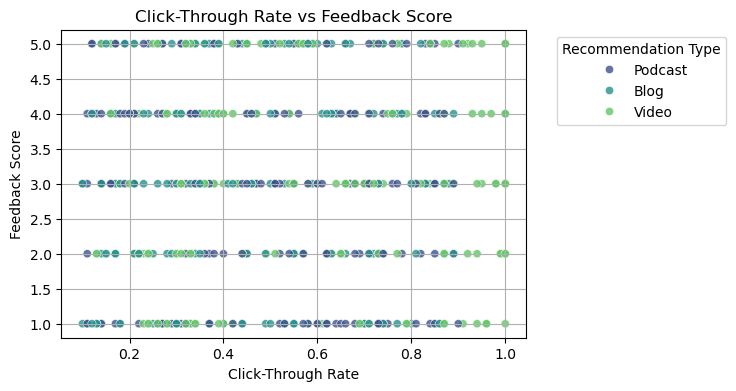

In [29]:
# Correlation Analysis: CTR vs Feedback Score
correlation = recommendation_data[['click_through_rate', 'feedback_score']].corr()
print("Correlation Matrix:\n", correlation)

# Scatter plot for CTR vs Feedback Score
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=recommendation_data,
    x='click_through_rate',
    y='feedback_score',
    hue='recommendation_type',
    palette='viridis',
    alpha=0.8
)
plt.title("Click-Through Rate vs Feedback Score")
plt.xlabel("Click-Through Rate")
plt.ylabel("Feedback Score")
plt.legend(title='Recommendation Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Insights: 

Videos have the highest CTR (0.58), making them most engaging, followed by Podcasts (0.50) and Blogs (0.47). 

Feedback scores (~3) are consistent across types. 

No strong CTR-feedback correlation observed.

## Joining User Activity and Recommendation

In [30]:
combined_data = pd.merge(user_activity_data, recommendation_data, on='user_id', how='inner')

combined_data.head()

user_id                            session_id  \
0  75c93e70-8082-484b-a0b6-4ea590bddcb0  3943c73b-8652-4059-8bdc-01915c252841   
1  264c18df-cf41-49fd-9bd9-9f17b9e68549  f47d46ec-a26c-4024-9415-262d8316cd3f   
2  159c0665-af87-480f-b073-c36c031f5ac6  ca41f4c2-98f2-4819-a449-88ca3a1c0b26   
3  159c0665-af87-480f-b073-c36c031f5ac6  ca41f4c2-98f2-4819-a449-88ca3a1c0b26   
4  826862c1-3e22-4c66-8be3-25be40a02ee5  14fb6c92-75a2-4638-8dae-d5f730b0ded1   

                   timestamp  session_length  messages_sent  feedback_rating  \
0 2024-07-01 21:30:38.935476              97             27                3   
1 2024-08-31 23:34:27.429215              76             33                4   
2 2024-09-08 01:35:41.587595              65             24                4   
3 2024-09-08 01:35:41.587595              65             24                4   
4 2024-08-21 18:28:31.725956              91             25                6   

   resources_clicked day_of_week                     recommendation_id  \
0                  1      Monday  8409e9ba-4816-4d9b-ae18-b17056a6863a   
1                  4    Saturday  1fe311e2-8485-4653-a2c4-ac50bd60d00e   
2                  3      Sunday  7d735a46-1c33-4b0d-9568-1a0ccabf28b8   
3                  3      Sunday  a8fe8244-c3a5-48d7-b224-1524aca788be   
4                  1   Wednesday  9aa1efb3-e4b1-456e-a819-64055769adb4   

  recommendation_type  click_through_rate  feedback_score  
0                Blog                0.27               1  
1               Video                0.79               1  
2                Blog                0.34               2  
3               Video                0.36               4  
4             Podcast                0.53               4

In [31]:
# Average feedback score and click-through rate by recommendation type
recommendation_insights = combined_data.groupby('recommendation_type').agg({
    'feedback_score': 'mean',
    'click_through_rate': 'mean',
    'session_length': 'mean',
    'messages_sent': 'mean'
}).reset_index()


print("\nRecommendation Insights by Type:")
print(recommendation_insights)



Recommendation Insights by Type:
  recommendation_type  feedback_score  click_through_rate  session_length  \
0                Blog        3.100671            0.467852       64.228188   
1             Podcast        2.966851            0.500221       66.182320   
2               Video        3.088235            0.582588       67.105882   

   messages_sent  
0      28.536913  
1      26.723757  
2      28.929412  


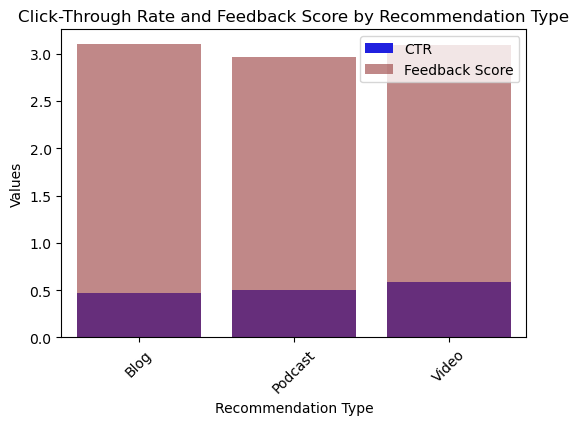

In [32]:
plt.figure(figsize=(6, 4))
sns.barplot(data=recommendation_insights, x='recommendation_type', y='click_through_rate', color='blue', label='CTR')
sns.barplot(data=recommendation_insights, x='recommendation_type', y='feedback_score', color='brown', alpha=0.6, label='Feedback Score')
plt.title("Click-Through Rate and Feedback Score by Recommendation Type")
plt.xlabel("Recommendation Type")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Correlation Matrix:
                     feedback_rating  session_length  messages_sent  \
feedback_rating            1.000000        0.187195      -0.064347   
session_length             0.187195        1.000000       0.095566   
messages_sent             -0.064347        0.095566       1.000000   
click_through_rate        -0.000219        0.069822       0.001772   
feedback_score            -0.003196       -0.002902       0.040450   

                    click_through_rate  feedback_score  
feedback_rating              -0.000219       -0.003196  
session_length                0.069822       -0.002902  
messages_sent                 0.001772        0.040450  
click_through_rate            1.000000        0.001111  
feedback_score                0.001111        1.000000  


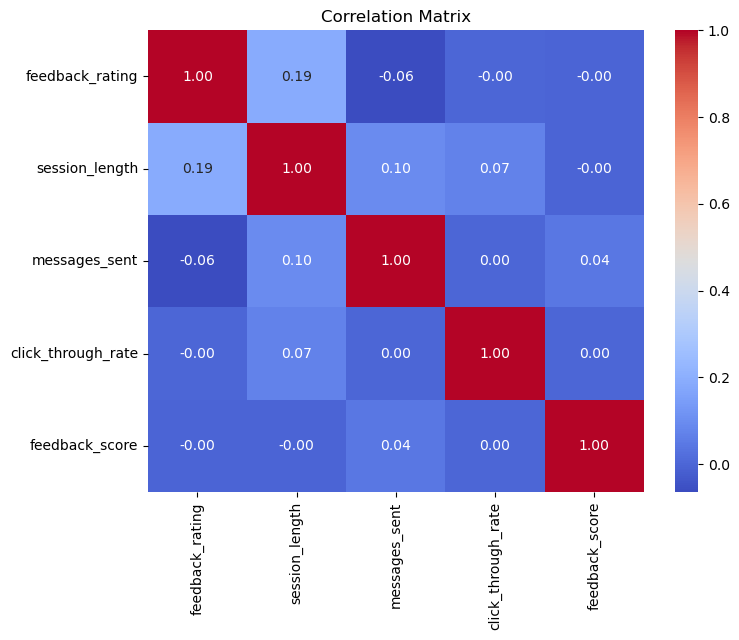

In [33]:
correlation_matrix = combined_data[['feedback_rating', 'session_length', 'messages_sent', 'click_through_rate', 'feedback_score']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

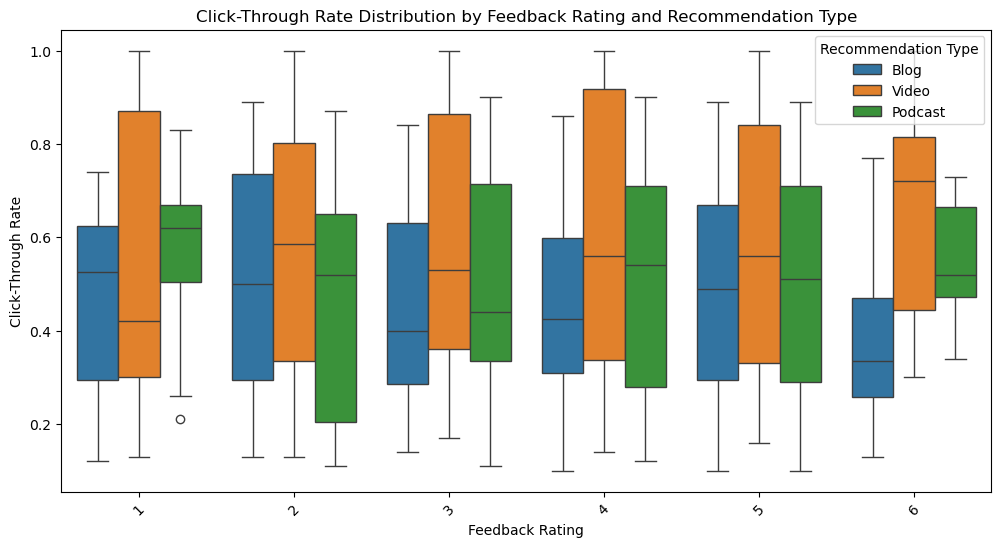

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='feedback_rating', y='click_through_rate', hue='recommendation_type')
plt.title("Click-Through Rate Distribution by Feedback Rating and Recommendation Type")
plt.xlabel("Feedback Rating")
plt.ylabel("Click-Through Rate")
plt.xticks(rotation=45)
plt.legend(title='Recommendation Type')
plt.show()


In [35]:
# Segment session lengths into categories
combined_data['session_segment'] = pd.cut(
    combined_data['session_length'], 
    bins=[0, 15, 30, 60, combined_data['session_length'].max()], 
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

# Perform groupby analysis with observed=False to retain current behavior
session_segment_analysis = combined_data.groupby('session_segment', observed=False).agg({
    'click_through_rate': 'mean',
    'feedback_score': 'mean',
    'messages_sent': 'mean'
})

# Display results
print(session_segment_analysis)


                 click_through_rate  feedback_score  messages_sent
session_segment                                                   
Short                      0.469487        2.948718      25.769231
Medium                     0.502667        3.333333      24.233333
Long                       0.505294        2.899160      30.058824
Very Long                  0.534362        3.063830      28.265957


In [36]:
combined_data.head()

user_id                            session_id  \
0  75c93e70-8082-484b-a0b6-4ea590bddcb0  3943c73b-8652-4059-8bdc-01915c252841   
1  264c18df-cf41-49fd-9bd9-9f17b9e68549  f47d46ec-a26c-4024-9415-262d8316cd3f   
2  159c0665-af87-480f-b073-c36c031f5ac6  ca41f4c2-98f2-4819-a449-88ca3a1c0b26   
3  159c0665-af87-480f-b073-c36c031f5ac6  ca41f4c2-98f2-4819-a449-88ca3a1c0b26   
4  826862c1-3e22-4c66-8be3-25be40a02ee5  14fb6c92-75a2-4638-8dae-d5f730b0ded1   

                   timestamp  session_length  messages_sent  feedback_rating  \
0 2024-07-01 21:30:38.935476              97             27                3   
1 2024-08-31 23:34:27.429215              76             33                4   
2 2024-09-08 01:35:41.587595              65             24                4   
3 2024-09-08 01:35:41.587595              65             24                4   
4 2024-08-21 18:28:31.725956              91             25                6   

   resources_clicked day_of_week                     recommendation_id  \
0                  1      Monday  8409e9ba-4816-4d9b-ae18-b17056a6863a   
1                  4    Saturday  1fe311e2-8485-4653-a2c4-ac50bd60d00e   
2                  3      Sunday  7d735a46-1c33-4b0d-9568-1a0ccabf28b8   
3                  3      Sunday  a8fe8244-c3a5-48d7-b224-1524aca788be   
4                  1   Wednesday  9aa1efb3-e4b1-456e-a819-64055769adb4   

  recommendation_type  click_through_rate  feedback_score session_segment  
0                Blog                0.27               1       Very Long  
1               Video                0.79               1       Very Long  
2                Blog                0.34               2       Very Long  
3               Video                0.36               4       Very Long  
4             Podcast                0.53               4       Very Long

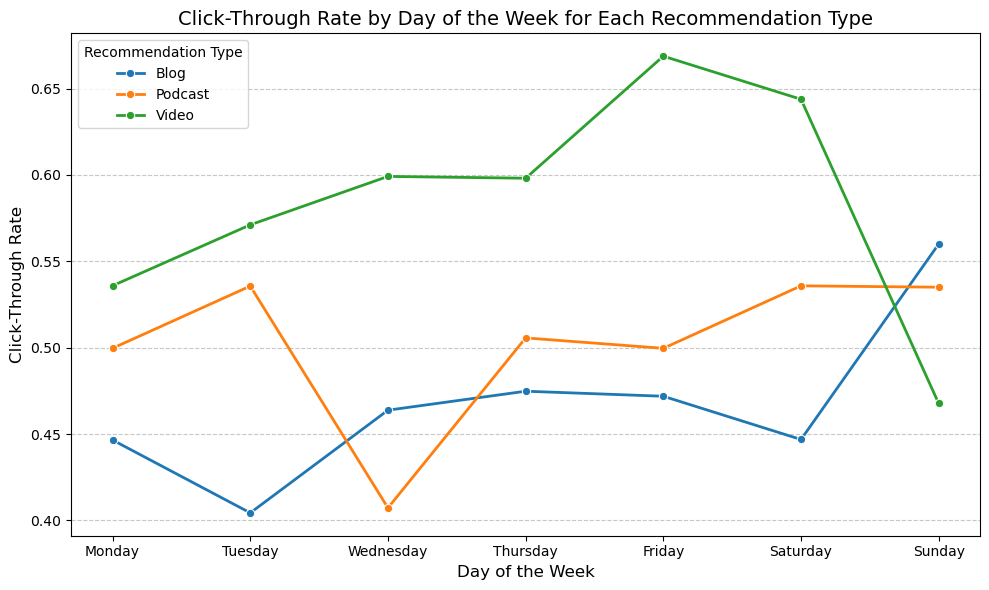

In [37]:
combined_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Group by day of the week and recommendation type
time_trends_by_day_recommendation = combined_data.groupby(['day_of_week', 'recommendation_type']).agg({
    'click_through_rate': 'mean',
    'feedback_score': 'mean',
    'session_length': 'mean'
}).reset_index()

# Ensure day_of_week is ordered correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_trends_by_day_recommendation['day_of_week'] = pd.Categorical(
    time_trends_by_day_recommendation['day_of_week'], categories=days_order, ordered=True
)
time_trends_by_day_recommendation = time_trends_by_day_recommendation.sort_values('day_of_week')

# Plot Click-Through Rate by Day of the Week
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=time_trends_by_day_recommendation, 
    x='day_of_week', 
    y='click_through_rate', 
    hue='recommendation_type', 
    marker='o',
    linewidth=2
)
plt.title("Click-Through Rate by Day of the Week for Each Recommendation Type", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Click-Through Rate", fontsize=12)
plt.legend(title='Recommendation Type', fontsize=10, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


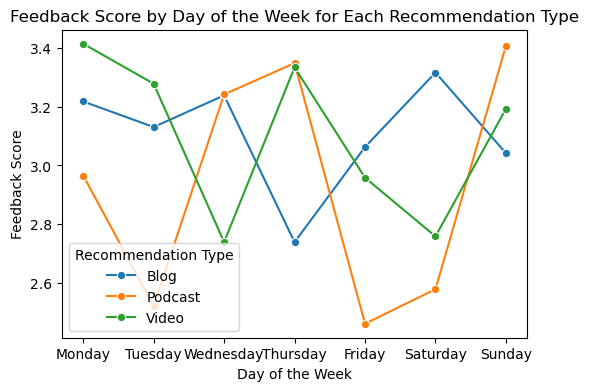

In [38]:
# Plot: Feedback Score by Day of the Week for Each Recommendation Type
plt.figure(figsize=(6,4))
sns.lineplot(data=time_trends_by_day_recommendation, x='day_of_week', y='feedback_score', hue='recommendation_type', marker='o')
plt.title("Feedback Score by Day of the Week for Each Recommendation Type")
plt.xlabel("Day of the Week")
plt.ylabel("Feedback Score")
plt.legend(title='Recommendation Type')
plt.show()

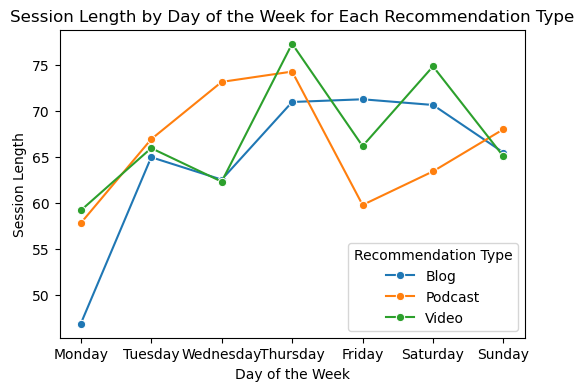

In [39]:
# Plot: Session Length by Day of the Week for Each Recommendation Type
plt.figure(figsize=(6,4))
sns.lineplot(data=time_trends_by_day_recommendation, x='day_of_week', y='session_length', hue='recommendation_type', marker='o')
plt.title("Session Length by Day of the Week for Each Recommendation Type")
plt.xlabel("Day of the Week")
plt.ylabel("Session Length")
plt.legend(title='Recommendation Type')
plt.show()


## Insights: 

Joining user activity and recommendation data reveals that Videos have the highest CTR (0.58) and session length (67 min), while Blogs lead in feedback score (3.1). 

Podcasts perform moderately in all metrics.

No strong correlation exists between CTR, feedback, or session metrics, indicating engagement (CTR) and satisfaction (feedback) are driven by different factors. 

Session Segments: Short sessions show lower CTR and feedback, while very long sessions (~30+ min) have moderate CTR (~0.53) and feedback (~3.06). 

## Day Trends: 

CTR, feedback, and session length vary by day.

Video CTR peaks on Fridays, while feedback is more stable across the week. 

Blogs have more consistent performance over weekdays. 

## Recommendations: 

Optimize recommendations based on content type and day trends (e.g., promote Videos on Fridays). 

Focus on improving shorter session engagement by tailoring recommendations. Refine content targeting to balance CTR (engagement) and feedback (satisfaction).

## Final Insights for :

•	Longer sessions correlate with higher feedback scores, showing satisfaction increases with engagement.

•	Videos drive the highest CTR (~0.58) and session length (~67 min), while Blogs lead in feedback (~3.1).

•	Video → Video and Blog → Video transitions maintain strong engagement, but Video → Blog disrupts CTR.

## Measuring Engagement/Effectiveness:

•	Engagement: CTR, session length, and messages sent.

•	Effectiveness: Feedback scores and transitions between recommendations.

## Trends and Patterns:

•	Videos outperform in CTR and session length, with cross-type transitions like Blog → Video enhancing engagement.

•	Feedback scores remain consistent across recommendation types, but CTR and feedback have no strong correlation.

•	Weekends show longer sessions with passive engagement, while Wednesdays see the highest messaging activity, and Thursdays peak in satisfaction scores. 

•	Weekday variations highlight opportunities to tailor recommendations for higher engagement on Wednesdays and feedback improvements on Thursdays.

## Concerns/Anomalies:

•	Short sessions (<15 min) show low engagement and feedback.

•	Negative CTR transitions like Video → Blog disrupt user flow.

•	Time-specific activity variations indicate different user behaviors on weekdays vs. weekends with Saturday and Sunday showing longer sessions but fewer messages sent.

## Recommendations:

1.	Focus on Video-first strategies and high-performing transitions like Blog → Video.
2.	Improve short session engagement by offering personalized recommendations or interactive content.
3.	Avoid negative CTR transitions like Video → Blog by improving relevance and targeting.
4.	Optimize recommendations for high-engagement days (Fridays, Wednesdays) and adjust content targeting based on time-of-day trends.
5.	Enhance cross-type transitions (e.g., Podcast → Video) with dynamic linking to retain users.
6.	Develop incentives for users with shorter sessions to increase engagement, such as quick surveys or gamified interactions.
7.	Use mid-week peaks (Wednesday, Thursday) for testing feedback-driven features to maximize satisfaction.
8.	Refine weekend recommendations to leverage longer session durations while boosting active participation.
9.	Target Wednesday for active engagement campaigns (messaging-focused) and Thursday for initiatives that maximize feedback collection and satisfaction.


# Moderator Analysis

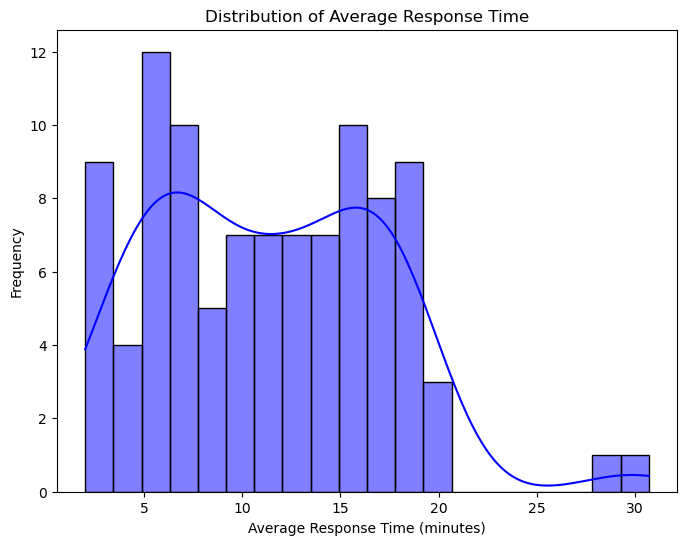

In [40]:
#to identify common ranges and outliers
plt.figure(figsize=(8, 6))
sns.histplot(moderator_performance_data['avg_response_time'], kde=True, bins=20, color='blue')
plt.title("Distribution of Average Response Time")
plt.xlabel("Average Response Time (minutes)")
plt.ylabel("Frequency")
plt.show()




Correlation Matrix:
                         avg_response_time  chat_sessions_moderated  \
avg_response_time                 1.000000                 0.014091   
chat_sessions_moderated           0.014091                 1.000000   
user_satisfaction_score          -0.000737                 0.140611   

                         user_satisfaction_score  
avg_response_time                      -0.000737  
chat_sessions_moderated                 0.140611  
user_satisfaction_score                 1.000000  


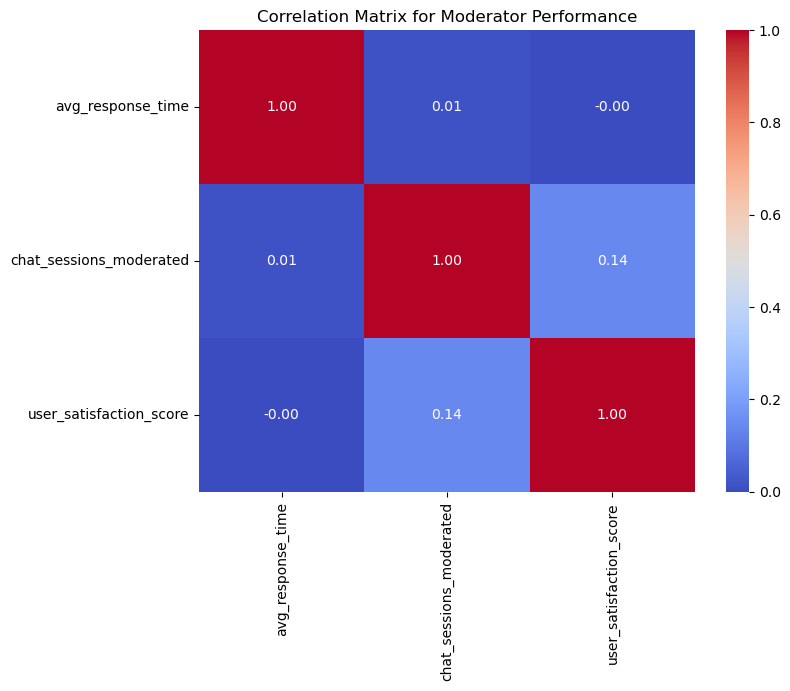

In [42]:
#Identify relationships between key metrics: 
#average response time, chat sessions moderated, and user satisfaction

correlation_matrix = moderator_performance_data[['avg_response_time', 'chat_sessions_moderated', 'user_satisfaction_score']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Moderator Performance")
plt.show()

## Insights: Response time has no significant correlation with user satisfaction, indicating other factors (e.g., communication quality) may drive satisfaction.

## Average Response Time Metric

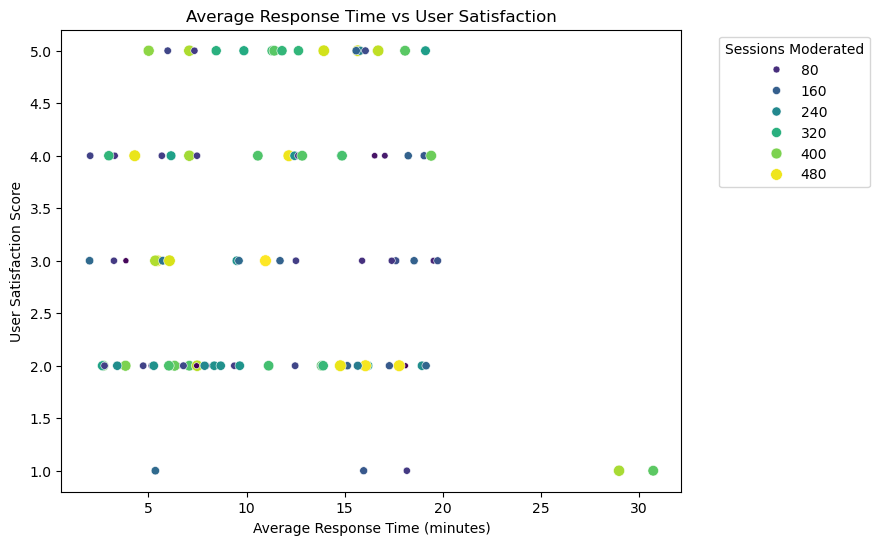

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=moderator_performance_data, x='avg_response_time', y='user_satisfaction_score', hue='chat_sessions_moderated', palette='viridis', size='chat_sessions_moderated')
plt.title("Average Response Time vs User Satisfaction")
plt.xlabel("Average Response Time (minutes)")
plt.ylabel("User Satisfaction Score")
plt.legend(title="Sessions Moderated", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

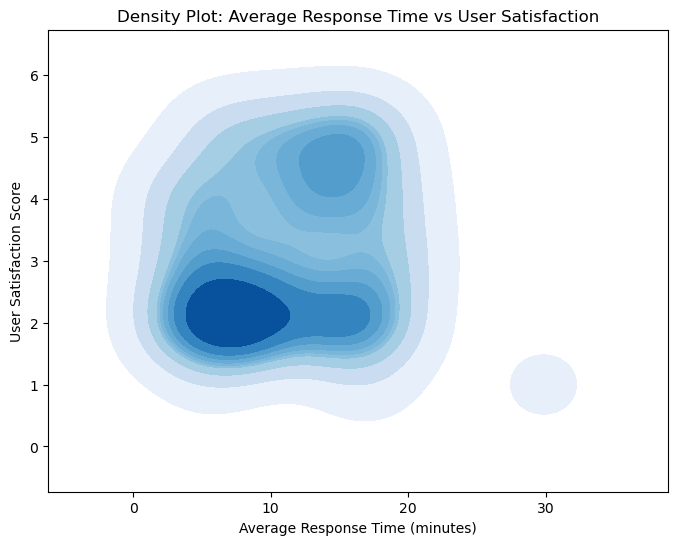

In [44]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=moderator_performance_data,
    x='avg_response_time',
    y='user_satisfaction_score',
    cmap='Blues',
    fill=True
)
plt.title("Density Plot: Average Response Time vs User Satisfaction")
plt.xlabel("Average Response Time (minutes)")
plt.ylabel("User Satisfaction Score")
plt.show()


## Insights: Assesses efficiency but does not strongly correlate with satisfaction.

## Performance Categories (using user satisfaction): 'Low', 'Medium', 'High'

In [45]:
moderator_groups = moderator_performance_data.copy()
moderator_groups['performance_category'] = pd.qcut(moderator_groups['user_satisfaction_score'], q=3, labels=['Low', 'Medium', 'High'])

grouped_data = moderator_groups.groupby('performance_category').agg({
    'avg_response_time': 'mean',
    'chat_sessions_moderated': 'mean',
    'user_satisfaction_score': 'mean'
}).reset_index()

print("\nPerformance Categories:")
print(grouped_data)


Performance Categories:
  performance_category  avg_response_time  chat_sessions_moderated  \
0                  Low          11.254651               236.558140   
1               Medium          10.898158               228.131579   
2                 High          12.544737               300.157895   

   user_satisfaction_score  
0                 1.883721  
1                 3.526316  
2                 5.000000  


<Figure size 1000x600 with 0 Axes>

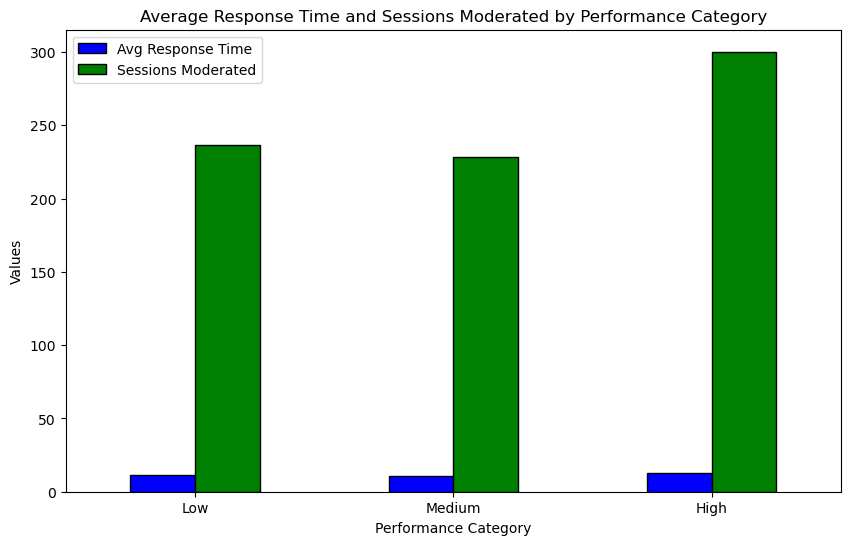

In [46]:
plt.figure(figsize=(10, 6))
grouped_data.set_index('performance_category')[['avg_response_time', 'chat_sessions_moderated']].plot(kind='bar', figsize=(10, 6), color=['blue', 'green'], edgecolor='black')
plt.title("Average Response Time and Sessions Moderated by Performance Category")
plt.xlabel("Performance Category")
plt.ylabel("Values")
plt.legend(["Avg Response Time", "Sessions Moderated"])
plt.xticks(rotation=0)
plt.show()

# Outcome:

## Insights: 
Response time has no significant correlation with satisfaction, but higher sessions moderated slightly improve satisfaction. Top moderators handle ~300+ sessions with consistent satisfaction.

## Engagement/Effectiveness: 
Engagement = sessions moderated 
Effectiveness = satisfaction scores

## Trends: 
Satisfaction clusters around 3–4 
Outliers exist for response times >25 mins.

## Concerns: 
Low-performing moderators handle fewer sessions and have high avg response time, impacting engagement.

## Recommendations: 
Train low performers, focus on communication quality, and share best practices